# Importing the Libraries

#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [6]:
# loading the csv data to a Pandas DataFrame
gold_data= pd.read_csv('gld_price_data.csv')

In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and column
gold_data.shape

(2290, 6)

In [11]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation :
### 1)Positive
### 2)Negative

In [14]:
correlation= gold_data.corr()

C:\Users\osman\AppData\Local\Temp\ipykernel_11940\3707225924.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= gold_data.corr()


<Axes: >

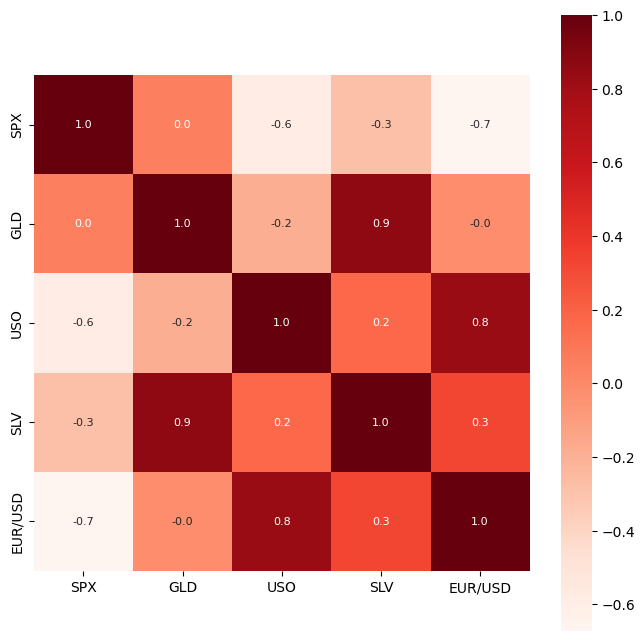

In [18]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize=(8, 8)) 
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Reds') 

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


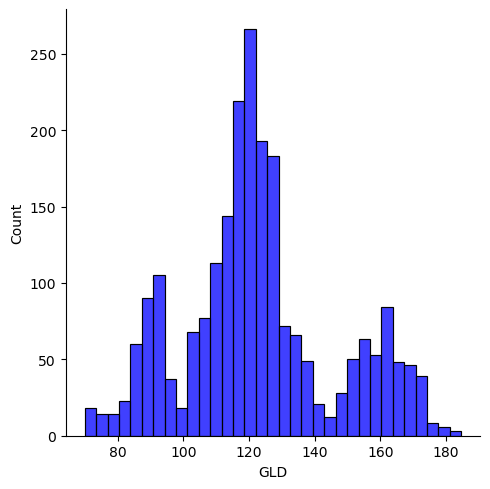

In [21]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='blue')

# Splitting the Features and Target

In [25]:
X= gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [29]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training: Random Forest Regressor

In [34]:
regressior=RandomForestRegressor(n_estimators=100)

In [36]:
regressior.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [46]:
# prediction on Test Dat
test_data_prediction= regressior.predict(X_test)

In [39]:
print(test_data_prediction)

[168.51759906  81.90160009 115.93289986 127.58210073 120.68550121
 154.7228981  149.86669781 126.19030049 117.56569884 125.89270104
 116.77350107 171.47880049 141.24619833 167.77999848 115.217
 117.94170077 141.17170241 170.17280065 159.27160332 159.31659945
 155.09650034 124.93820019 176.15099877 157.56780397 125.15420081
  93.85869972  77.89049993 120.68239995 119.1406998  167.39950098
  88.25489996 125.06650001  91.22790089 117.55800056 121.09459899
 136.42860034 115.59630107 115.03780078 147.12649998 107.25330105
 104.13300226  87.1928979  126.44310043 117.91010003 153.65539877
 119.52360026 108.54700028 108.29269827  93.09870055 127.12849782
  75.25210024 113.66449927 121.24320047 111.32149904 118.89439897
 120.40759928 159.198001   169.48780079 147.07139692  85.69299855
  94.27260029  86.83459886  90.56130026 119.02220055 126.46220038
 127.39190023 169.13349987 122.29169911 117.26499927  98.61010003
 167.43520133 143.25869848 132.30160267 121.1764021  120.88889924
 119.57950063 1

In [41]:
# R squared error
error_score= metrics.r2_score(Y_test,test_data_prediction)
print( "R Squared error : ",error_score)

R Squared error :  0.9892786602027335


# Compare the Actual Values and Predicted Values in a Plot

In [42]:
Y_test= list(Y_test)

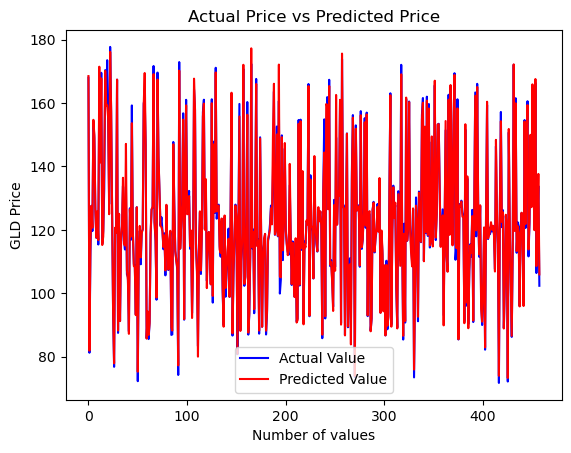

In [45]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
